# Info

- ORCHID
- imported from south archipelago
- if sunlight exxposure is less than 7 hours per day production decreases with 4% for every ten minutes
- ideal humidity is between 60% and 80%; production falls for 2% for every 5% point for humidity change

- storage: 0.1 seashell per orchid per timestep

# Tasks:
- calculate avg trade volume and order book volume -> doesnt seem to be liquid enough to market make
- look at executed trades for amethyst and starfruit, also create more features and use MSE to evaluate regressions


# Idea
- arbitrage between two markets
- if we can make profit buy selling and buying on the two markets send orders on current market and then cover it in secondary in next step
- ideally predict price movement in next step and calculate profitability from that not from current price
- could also include a longer time horizon with regression
- do order matching for all orders that are still profitable

- check for big change in pnl in IMC sim (why, maybe correlated with one of the variables)?

In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def calculate_r_squared(Y_pred, Y):
    # Ensure both arrays have the same shape
    assert Y_pred.shape == Y.shape, "Arrays must have the same shape"

    # Calculate mean of Y
    Y_mean = np.mean(Y)

    # Calculate TSS
    TSS = np.sum((Y - Y_mean) ** 2)

    # Calculate RSS
    RSS = np.sum((Y - Y_pred) ** 2)

    # Calculate R-squared
    r_squared = 1 - (RSS / TSS)
    return r_squared

In [455]:

prices_path__1 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_-1.csv'
prices_path_1 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_1.csv'
prices_path_0 = r'D:/Projects/IMC_Challenge/Round_2/data/prices_round_2_day_0.csv'
df__1 = pd.read_csv(prices_path__1, sep=";")
df_0 = pd.read_csv(prices_path_0, sep=";")
df_1 = pd.read_csv(prices_path_1, sep=";")

merged = pd.concat([df__1,df_0,df_1], axis=0)
merged = merged.fillna(3) 
merged = merged.drop(['DAY','timestamp'], axis=1)
merged.index = np.arange(1,30004)

df_1['ORCHIDS_diff'] = df_1.ORCHIDS.diff(3)
df_1['ORCHIDS_rolling10'] = df_1['ORCHIDS'].rolling(10).mean()
df_1['ORCHIDS_rolling20'] = df_1['ORCHIDS'].rolling(20).mean()

df_1['HUMIDITY_rolling20'] = df_1['HUMIDITY'].rolling(10).mean()
df_1['HUMIDITY_rolling20_sq'] = df_1['HUMIDITY'].rolling(10).mean()**2
df_1['HUMIDITY_rolling20_cb'] = df_1['HUMIDITY'].rolling(10).mean()**3
df_1['HUMIDITY_rolling20_fth'] = df_1['HUMIDITY'].rolling(10).mean()**4

df_1['SUNLIGHT_rolling20'] = df_1['SUNLIGHT'].rolling(10).mean()
df_1['SUNLIGHT_rolling20_sq'] = df_1['SUNLIGHT'].rolling(10).mean()**2
df_1['SUNLIGHT_rolling20_cb'] = df_1['SUNLIGHT'].rolling(10).mean()**3
df_1['SUNLIGHT_rolling20_fth'] = df_1['SUNLIGHT'].rolling(10).mean()**4

df_1['SUN_HUM']=df_1['HUMIDITY']*df_1['SUNLIGHT']


# print(merged.shape)
# print(merged.keys())
# print(merged.describe())
# print(merged.corr())
df_1

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ORCHIDS_diff,ORCHIDS_rolling10,ORCHIDS_rolling20,HUMIDITY_rolling20,HUMIDITY_rolling20_sq,HUMIDITY_rolling20_cb,HUMIDITY_rolling20_fth,SUNLIGHT_rolling20,SUNLIGHT_rolling20_sq,SUNLIGHT_rolling20_cb,SUNLIGHT_rolling20_fth,SUN_HUM
0,0,1098.25,0.9,10.5,-5.0,2100.0000,70.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147000.000000
1,100,1098.25,0.9,9.5,-5.0,2099.7570,70.022710,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147030.675481
2,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147061.231402
3,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,-1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147091.594222
4,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147121.830399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.935490,1,-5.50,1042.2,1046.1625,69.864344,4881.026563,341009.718839,2.382442e+07,2299.91291,5.289599e+06,1.216562e+10,2.797986e+13,160847.682638
9997,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.951530,1,-3.50,1041.0,1045.4875,69.880105,4883.229075,341240.560487,2.384593e+07,2299.91855,5.289625e+06,1.216571e+10,2.798014e+13,160885.413152
9998,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.967620,1,-2.50,1040.1,1044.7625,69.895926,4885.440471,341472.385666,2.386753e+07,2299.92561,5.289658e+06,1.216582e+10,2.798048e+13,160923.357004
9999,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.983780,1,-2.00,1039.1,1043.8375,69.911808,4887.660898,341705.210258,2.388923e+07,2299.93409,5.289697e+06,1.216595e+10,2.798089e+13,160961.574260


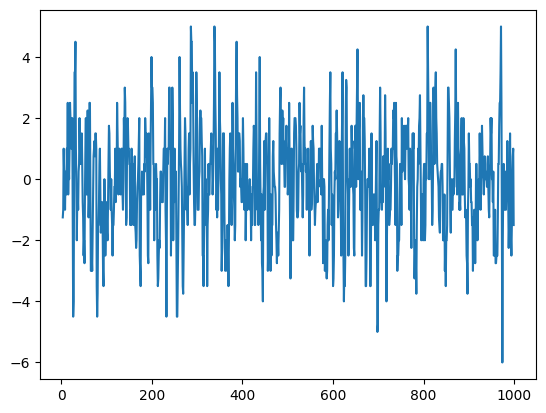

In [456]:
plt.plot(df_1['ORCHIDS_diff'][:1000])

In [487]:
X = []
Y = []
trend = np.array(df_1['ORCHIDS'].to_list())
#trend2 = np.array(df_1['ORCHIDS_rolling20'].to_list())

timestep = 5
forecast = 1

# set i to skip nan values from rolling averages
for i in range(51,len(trend)-timestep-1-forecast-5):
    #diff = df_1['ORCHIDS_diff'][i]

    hum = df_1['HUMIDITY'][i]
    hum_l = df_1['HUMIDITY'][i-1]
    hum_20 = np.array(df_1['HUMIDITY_rolling20'].to_list())[i]
    hum_20_sq = np.array(df_1['HUMIDITY_rolling20_sq'].to_list())[i]
    hum_20_cb = np.array(df_1['HUMIDITY_rolling20_cb'].to_list())[i]
    hum_20_fth = np.array(df_1['HUMIDITY_rolling20_fth'].to_list())[i]

    sun = df_1['SUNLIGHT'][i]
    sun_20 = np.array(df_1['SUNLIGHT_rolling20'].to_list())[i]
    sun_20_sq = np.array(df_1['SUNLIGHT_rolling20_sq'].to_list())[i]
    sun_20_cb = np.array(df_1['SUNLIGHT_rolling20_cb'].to_list())[i]
    sun_20_fth = np.array(df_1['SUNLIGHT_rolling20_fth'].to_list())[i]

    sun_hum = np.array(df_1['SUN_HUM'].to_list())[i]
    
    X.append(np.concatenate((trend[i:i+timestep], hum, sun), axis=None)) #  
    Y.append(df_1['ORCHIDS_diff'].to_list()[i+timestep+forecast])

X = np.array(X)
Y = np.array(Y)
print(X)

[[1100.25     1101.25     1102.25     ... 1100.75       71.11105
  2086.4456  ]
 [1101.25     1102.25     1102.25     ... 1101.75       71.131905
  2086.1567  ]
 [1102.25     1102.25     1100.75     ... 1102.75       71.15272
  2085.8672  ]
 ...
 [1048.75     1048.25     1045.25     ... 1044.25       69.778496
  2299.9014  ]
 [1048.25     1045.25     1044.25     ... 1042.75       69.79392
  2299.8992  ]
 [1045.25     1044.25     1044.25     ... 1040.75       69.80941
  2299.8984  ]]


In [488]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:6000], X[:6000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     441.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:57:41   Log-Likelihood:                -10507.
No. Observations:                6000   AIC:                         2.103e+04
Df Residuals:                    5992   BIC:                         2.108e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2235      1.077      4.851      0.0

(9938,)
0.3305582643075201


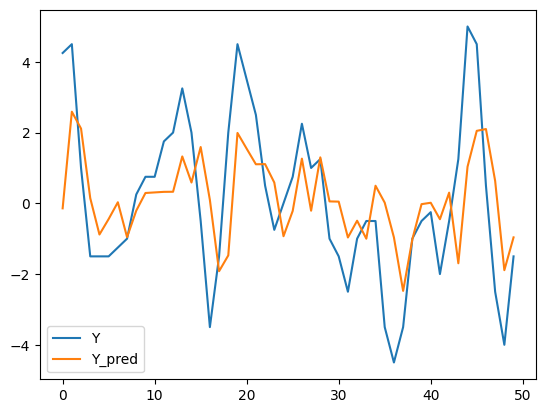

In [489]:
Y_pred = res.predict(X)
print(Y_pred.shape)
#plt.plot(df_1['ORCHIDS'][:1000])
plt.plot(Y[6000:6050],label='Y')
plt.plot(Y_pred[6000:6050],label='Y_pred')
plt.legend()
print(calculate_r_squared(Y_pred, Y))

# Test prediction on a whole day

In [465]:
df__1['ORCHIDS_diff'] = df__1.ORCHIDS.diff(3)
df__1['ORCHIDS_rolling10'] = df__1['ORCHIDS'].rolling(10).mean()
df__1['ORCHIDS_rolling20'] = df__1['ORCHIDS'].rolling(20).mean()

df__1['HUMIDITY_rolling20'] = df__1['HUMIDITY'].rolling(10).mean()
df__1['HUMIDITY_rolling20_sq'] = df__1['HUMIDITY'].rolling(10).mean()**2
df__1['HUMIDITY_rolling20_cb'] = df__1['HUMIDITY'].rolling(10).mean()**3
df__1['HUMIDITY_rolling20_fth'] = df__1['HUMIDITY'].rolling(10).mean()**4

df__1['SUNLIGHT_rolling20'] = df_1['SUNLIGHT'].rolling(10).mean()
df__1['SUNLIGHT_rolling20_sq'] = df_1['SUNLIGHT'].rolling(10).mean()**2
df__1['SUNLIGHT_rolling20_cb'] = df_1['SUNLIGHT'].rolling(10).mean()**3
df__1['SUNLIGHT_rolling20_fth'] = df_1['SUNLIGHT'].rolling(10).mean()**4

df_1['SUN_HUM']=df_1['HUMIDITY']*df_1['SUNLIGHT']

X = []
Y = []
trend = np.array(df__1['ORCHIDS'].to_list())
#trend2 = np.array(df_1['ORCHIDS_rolling20'].to_list())

timestep = 20
forecast = 1

# set i to skip nan values from rolling averages
for i in range(51,len(trend)-timestep-1-forecast-5):
    #diff = df_1['ORCHIDS_diff'][i]

    hum = df__1['HUMIDITY'][i]
    hum_20 = np.array(df__1['HUMIDITY_rolling20'].to_list())[i]
    hum_20_sq = np.array(df__1['HUMIDITY_rolling20_sq'].to_list())[i]
    hum_20_cb = np.array(df__1['HUMIDITY_rolling20_cb'].to_list())[i]
    hum_20_fth = np.array(df__1['HUMIDITY_rolling20_fth'].to_list())[i]

    sun = df_1['SUNLIGHT'][i]
    sun_20 = np.array(df__1['SUNLIGHT_rolling20'].to_list())[i]
    sun_20_sq = np.array(df__1['SUNLIGHT_rolling20_sq'].to_list())[i]
    sun_20_cb = np.array(df__1['SUNLIGHT_rolling20_cb'].to_list())[i]
    sun_20_fth = np.array(df__1['SUNLIGHT_rolling20_fth'].to_list())[i]

    sun_hum = np.array(df_1['SUN_HUM'].to_list())[i]
    
    X.append(np.concatenate((trend[i:i+timestep], hum, hum_20, hum_20_sq, sun, sun_20), axis=None)) #  
    Y.append(df__1['ORCHIDS_diff'].to_list()[i+timestep+forecast-1])

X = np.array(X)
Y = np.array(Y)
print(X)

KeyboardInterrupt: 

(9923,)
0.8649427394542861


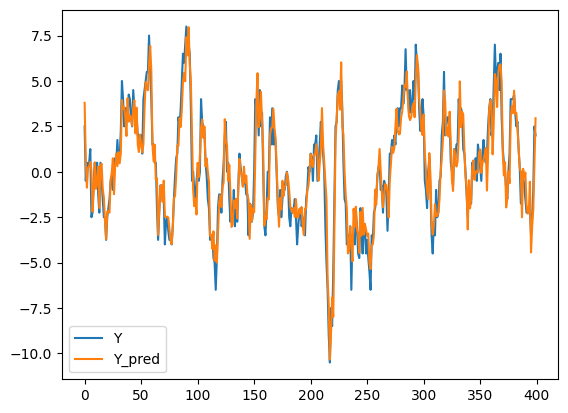

In [ ]:

X = sm.add_constant(X)
Y_pred = res.predict(X)
print(Y_pred.shape)
#plt.plot(df_1['ORCHIDS'][:1000])
plt.plot(Y[:400],label='Y')
plt.plot(Y_pred[:400],label='Y_pred')
plt.legend()



print(calculate_r_squared(Y_pred, Y))

# 3 day plots

Text(0.5, 1.0, 'import_tariff')

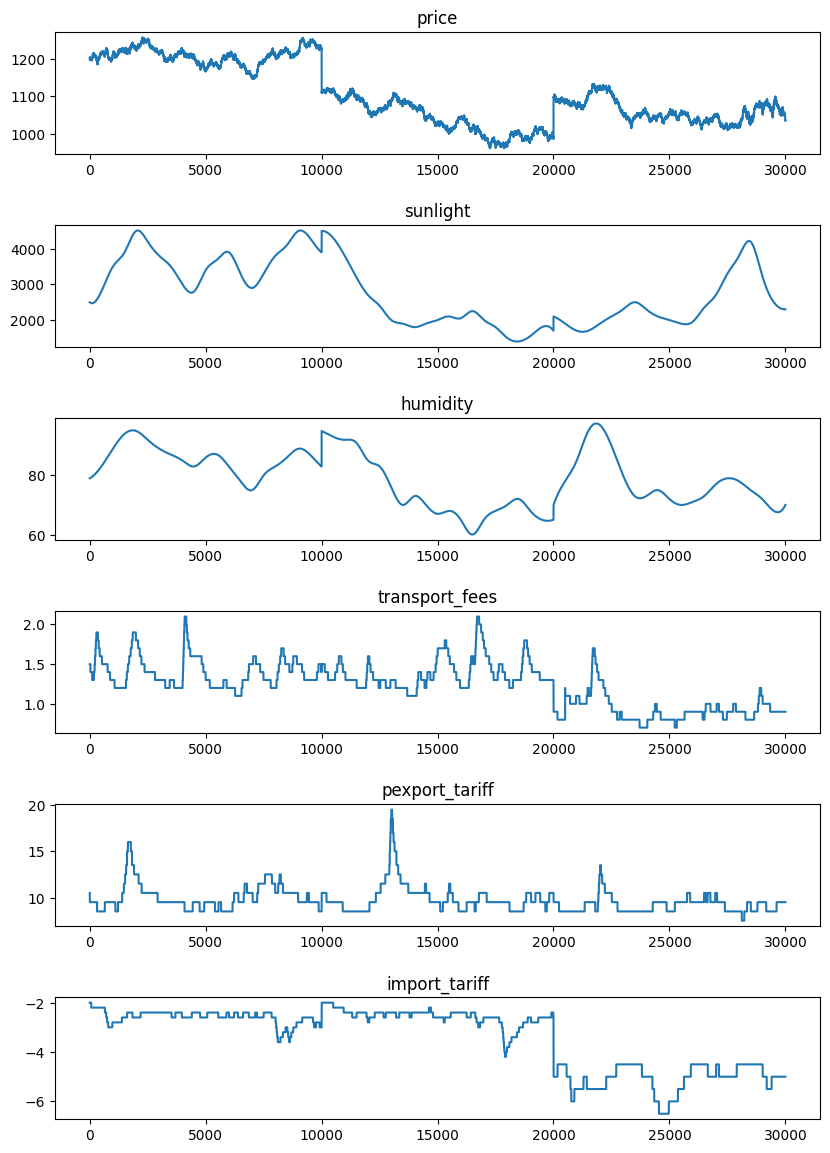

In [197]:
fig, ax = plt.subplots(6,figsize=(9, 12))
fig.tight_layout(pad=3.0)
ax[0].plot(merged['ORCHIDS'])
ax[0].set_title('price')
ax[1].plot(merged['SUNLIGHT'])
ax[1].set_title('sunlight')
ax[2].plot(merged['HUMIDITY'])
ax[2].set_title('humidity')
ax[3].plot(merged['TRANSPORT_FEES'])
ax[3].set_title('transport_fees')
ax[4].plot(merged['EXPORT_TARIFF'])
ax[4].set_title('pexport_tariff')
ax[5].plot(merged['IMPORT_TARIFF'])
ax[5].set_title('import_tariff')

In [128]:
import numpy as np
import pandas as pd
import pmdarima as pm

ts_data = np.array(df_1['ORCHIDS_diff'][2:].to_list())

# Find the best ARIMA model
model = pm.auto_arima(ts_data, exogenous=np.array(df_1['HUMIDITY_rolling20'].to_list())[2:], seasonal=True, stepwise=True, suppress_warnings=True)

# Print the best model's parameters
print("Best ARIMA Order:", model.order)
print("Best Seasonal Order:", model.seasonal_order)


Best ARIMA Order: (0, 0, 0)
Best Seasonal Order: (0, 0, 0, 0)


# STARFRUIT

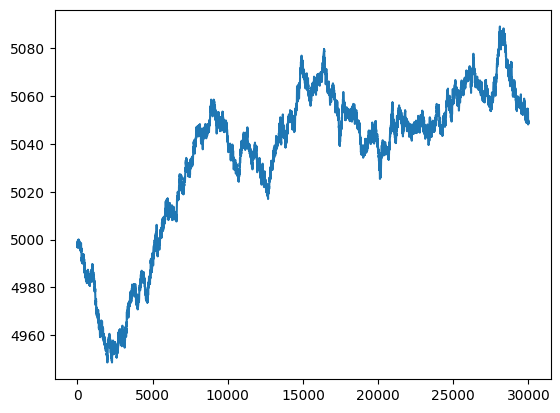

In [156]:
plt.plot(df_star['bid_price_1'].rolling(5).mean())

29995


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.729e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:47:43   Log-Likelihood:                -40433.
No. Observations:               20000   AIC:                         8.088e+04
Df Residuals:                   19995   BIC:                         8.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2342      1.909      1.694      0.0

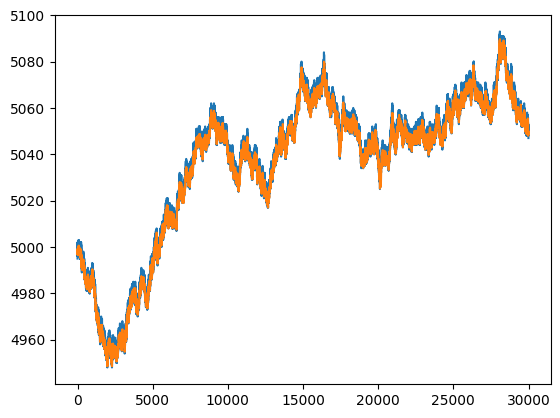

In [157]:
X = []
Y = []
trend = np.array(df_star['ask_price_1'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
print(len(X))
Y = np.array(Y)

29995


In [158]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:20000], X[:20000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.917e+06
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:49:44   Log-Likelihood:                -39434.
No. Observations:               20000   AIC:                         7.888e+04
Df Residuals:                   19995   BIC:                         7.892e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9417      1.815      1.621      0.1

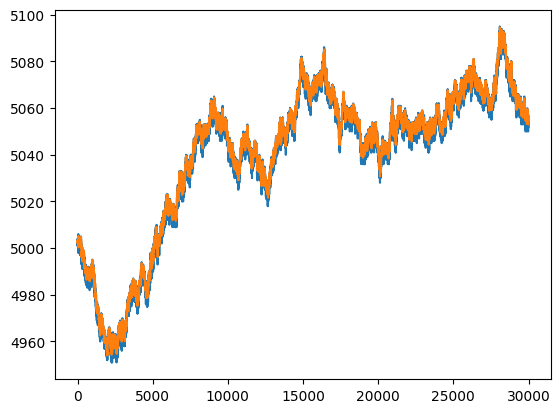

In [159]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)